In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
# Read csv
df = pd.read_csv('hw3.csv', index_col=0)
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [3]:
# drop duplicates
df = df.drop_duplicates()
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [4]:
# sort with time stamp
df = df.sort_values('ts')
df.head(10)

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,210.3120,NaN,208.4320,208.676000,7.003162e+04,NaN,SOL,SOL
2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.078000,2.730299e+03,NaN,AAVE,ETH
2021-12-01 00:00:00,4656.6200,4672.4300,4624.1600,4634.950000,6.013007e+03,NaN,ETH,ETH
2021-12-01 00:00:00,57321.4100,57451.0500,56814.3400,56987.970000,3.884820e+02,NaN,BTC,BTC
2021-12-01 00:00:00,280.5900,281.4000,278.3000,278.700000,2.078490e+02,NaN,COMP,ETH
2021-12-01 00:00:00,1.0008,1.0009,1.0008,1.000800,1.588402e+06,NaN,USDT,USDT
2021-12-01 00:00:00,4.8830,5.0723,4.8264,0.050295,3.395810e+05,NaN,CRV,ETH
2021-12-01 00:00:00,21.2004,21.3115,21.0337,21.265900,1.240613e+04,NaN,UNI,ETH
2021-12-01 01:00:00,278.6500,283.8000,276.3600,283.440000,8.176680e+02,NaN,COMP,ETH


### By looking at the data, we found we can do forward fill under the same token for missing close data

In [5]:
# check under filter "token"
df.token.value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
ETH                                   270
UNI                                   270
<span name="tokenName">ETH</span>      25
<span name="tokenName">UNI</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

In [6]:
# if df['token'] contains 'span', replace it, else, keep it
df['token'] = np.where(df['token'].str.contains('span'), df['token'].str.extract(r'<span.*?>(.*?)</span>', expand=False), df['token'])
df['token'].value_counts()

SOL     295
AAVE    295
ETH     295
BTC     295
COMP    295
USDT    295
CRV     295
UNI     295
Name: token, dtype: int64

In [7]:
# check whether there are values needed to be cleaned
print(pd.isnull(df.low).any())
print(pd.isnull(df.high).any())
print(pd.isnull(df.close).any())
print(pd.isnull(df.volume).any())
print(pd.isnull(df.open).any())

True
True
True
False
False


In [8]:
# so dealing with low, high, close
# sorted with token first, and then ts
df = df.sort_values(['token', 'ts'])
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.102,260.775,255.345,257.078,2730.299,NaN,AAVE,ETH
2021-12-01 01:00:00,257.149,266.249,255.270,264.816,5752.541,NaN,AAVE,ETH
2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.330,NaN,AAVE,ETH
2021-12-01 03:00:00,263.184,NaN,NaN,266.257,1647.398,NaN,AAVE,ETH
2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,NaN,AAVE,ETH


In [9]:
# can do forward fill now since on the same token
df['close'] = df.close.fillna(method ='ffill')
df['high'] = df.high.fillna(method ='ffill')
df['low'] = df.low.fillna(method ='ffill')
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.102,260.775,255.345,257.078,2730.299,NaN,AAVE,ETH
2021-12-01 01:00:00,257.149,266.249,255.270,264.816,5752.541,NaN,AAVE,ETH
2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.330,NaN,AAVE,ETH
2021-12-01 03:00:00,263.184,266.187,262.597,266.257,1647.398,NaN,AAVE,ETH
2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,NaN,AAVE,ETH


In [10]:
# double check whether there are values needed to be cleaned
print(pd.isnull(df.low).any())
print(pd.isnull(df.high).any())
print(pd.isnull(df.close).any())
print(pd.isnull(df.volume).any())
print(pd.isnull(df.open).any())

False
False
False
False
False


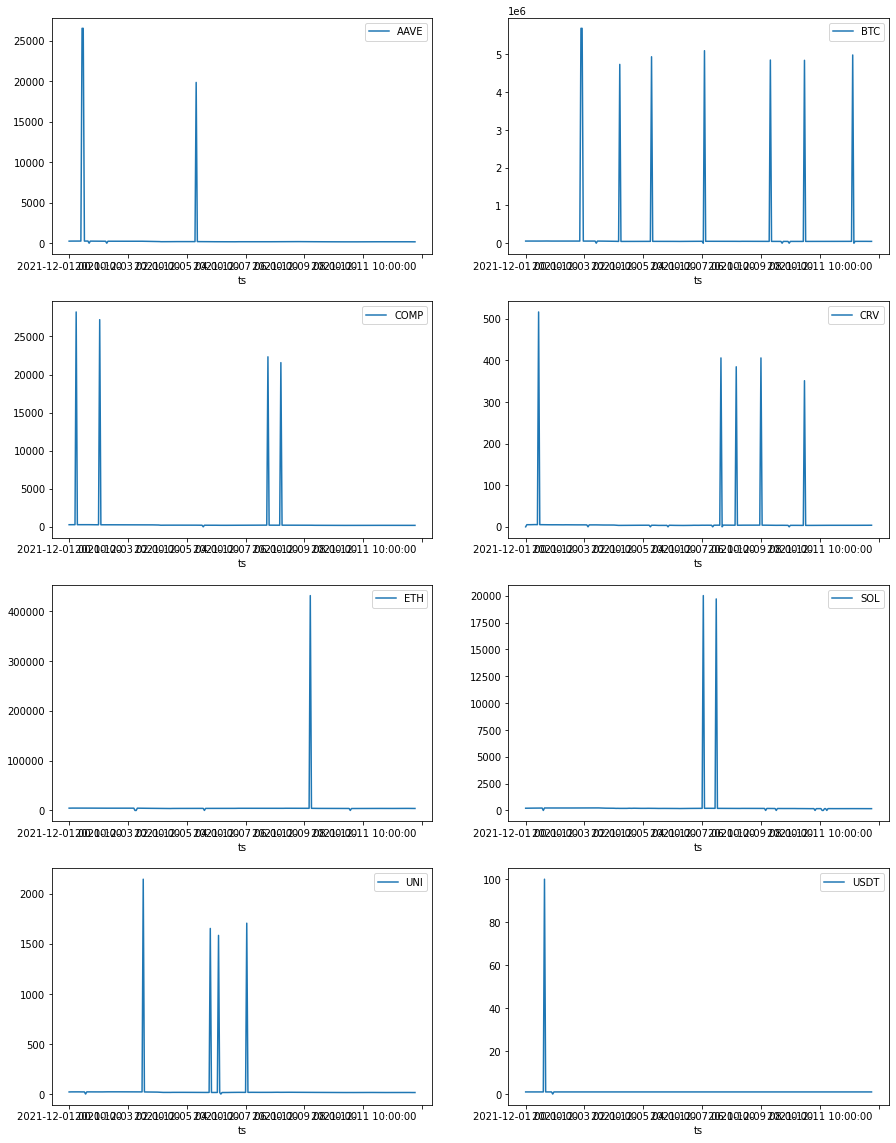

In [11]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1



In [12]:
# we can see there are noises so define one way to clean
df.loc[df.close / df.open >= 2].size

224

In [13]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

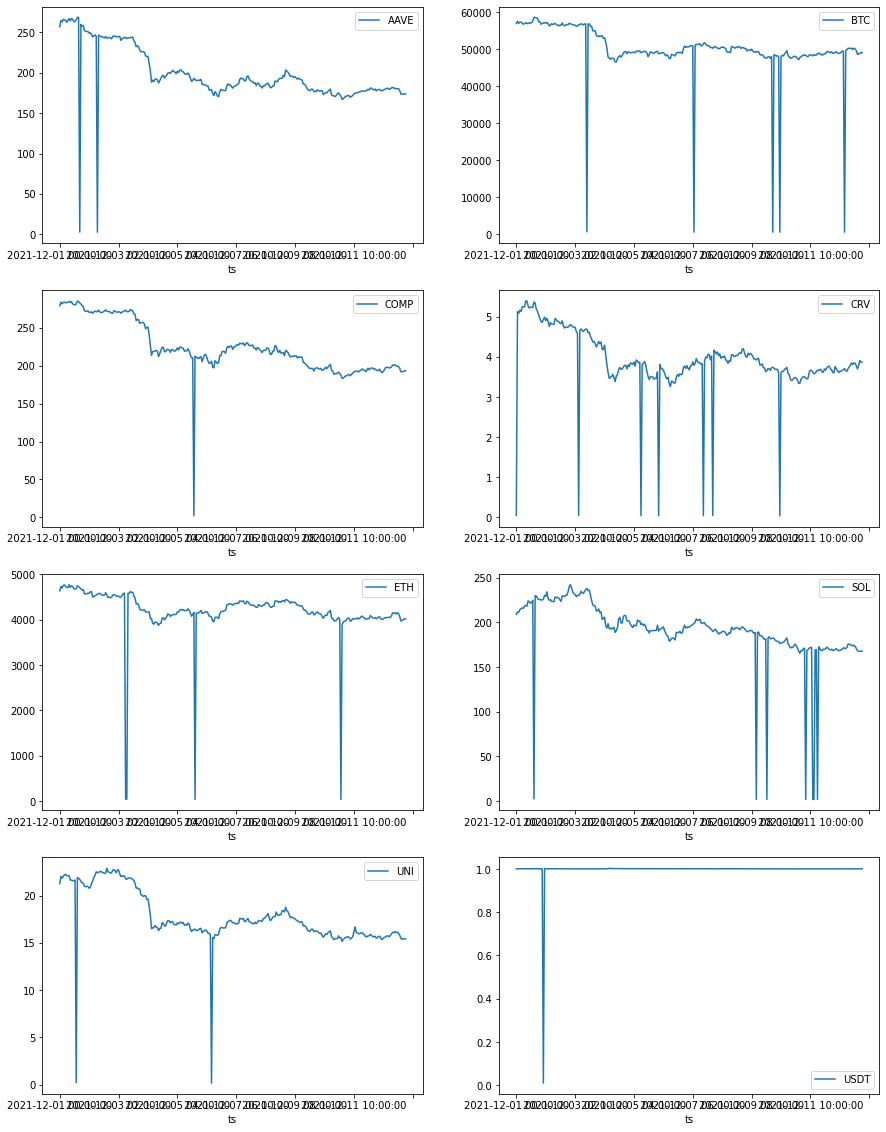

In [14]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1



In [15]:
# there are now small close price needed to be addressed
df.loc[df.close / df.open <0.5, 'close'] = 0.5 * (df.loc[df.close / df.open <0.5, 'high'] + df.loc[df.close / df.open <0.5, 'low'])

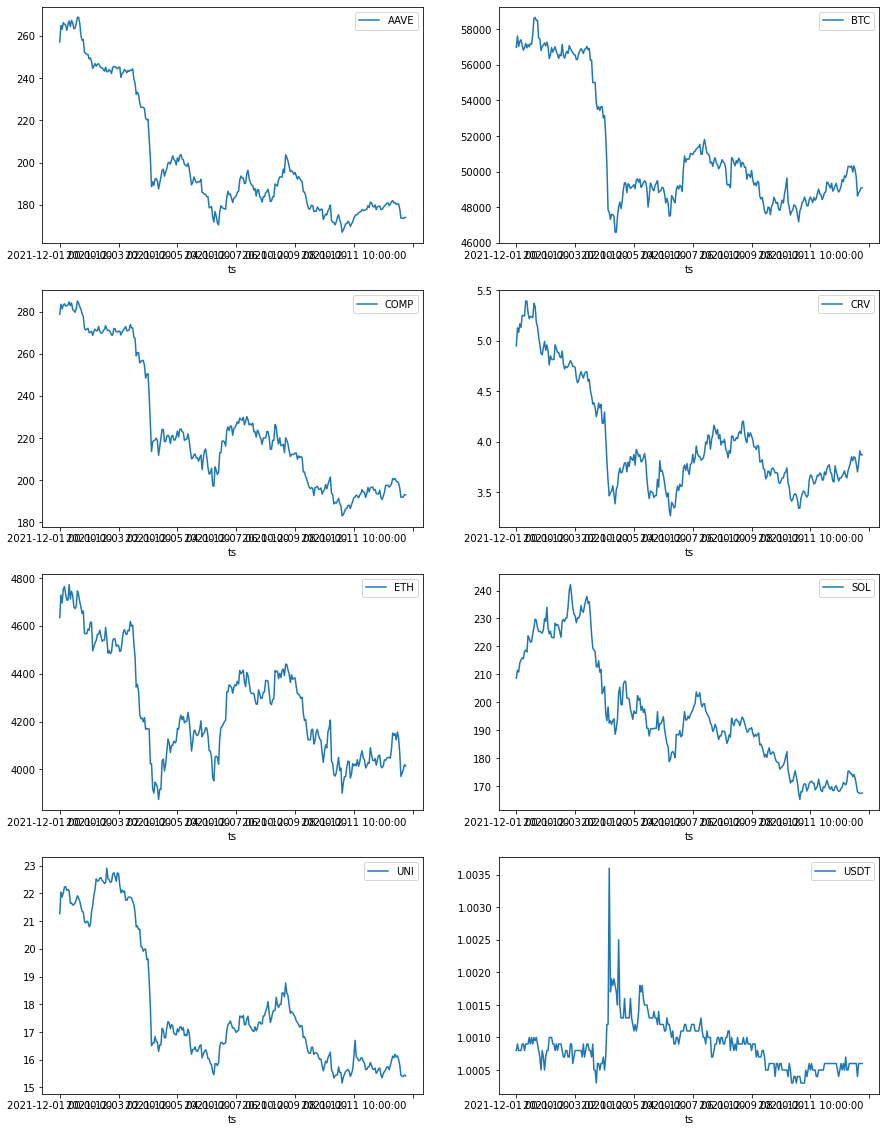

In [16]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1




In [17]:
# looks much better now so calculate the volumeUSD
df['volumeUSD'] = df.volume*df.close
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299,7.018998e+05,AAVE,ETH
2021-12-01 01:00:00,257.1490,266.2490,255.2700,264.8160,5752.541,1.523365e+06,AAVE,ETH
2021-12-01 02:00:00,264.7550,266.1870,262.5970,263.1250,1559.330,4.102987e+05,AAVE,ETH
2021-12-01 03:00:00,263.1840,266.1870,262.5970,266.2570,1647.398,4.386312e+05,AAVE,ETH
2021-12-01 04:00:00,266.3840,267.0240,264.2840,265.5020,829.993,2.203648e+05,AAVE,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,1.0005,1.0006,1.0004,1.0004,7133859.470,7.136713e+06,USDT,USDT
2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.530,4.340487e+06,USDT,USDT
2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.910,2.930650e+06,USDT,USDT


In [18]:
# final answer...
df.groupby('chain')['volumeUSD'].sum()

chain
BTC     1.095855e+10
ETH     1.367000e+10
SOL     4.076772e+09
USDT    1.007860e+09
Name: volumeUSD, dtype: float64